In [136]:
import pandas as pd

In [137]:
import matplotlib.pyplot as plt

In [138]:
!pip install matplotlib

In [139]:
Sales_Data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Documents\\sales_Project_data_.csv")

In [140]:
Sales_Data['date'] = pd.to_datetime(Sales_Data['date'])

In [141]:
Sales_Data

,date,product,quantity,price
0,2024-01-01 00:00:00.000000000,Charger,5,500
1,2024-01-01 08:46:07.567567567,Tablet,4,30000
2,2024-01-01 17:32:15.135135135,Headphones,3,1500
3,2024-01-02 02:18:22.702702702,Tablet,1,30000
4,2024-01-02 11:04:30.270270270,Tablet,3,30000
...,...,...,...,...
995,2024-12-29 12:55:29.729729728,Smartwatch,4,8000
996,2024-12-29 21:41:37.297297296,Tablet,1,30000
997,2024-12-30 06:27:44.864864864,Mobile,1,12000
998,2024-12-30 15:13:52.432432432,Mobile,3,12000


In [142]:
Sales_Data[Sales_Data.isnull().any(axis=1)].nunique()


date        0
product     0
quantity    0
price       0
dtype: int64

In [143]:
Sales_Data.set_index('date')

,product,quantity,price
date,,,
2024-01-01 00:00:00.000000000,Charger,5,500
2024-01-01 08:46:07.567567567,Tablet,4,30000
2024-01-01 17:32:15.135135135,Headphones,3,1500
2024-01-02 02:18:22.702702702,Tablet,1,30000
2024-01-02 11:04:30.270270270,Tablet,3,30000
...,...,...,...
2024-12-29 12:55:29.729729728,Smartwatch,4,8000
2024-12-29 21:41:37.297297296,Tablet,1,30000
2024-12-30 06:27:44.864864864,Mobile,1,12000


In [144]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1000 non-null   datetime64[ns]
 1   product   1000 non-null   object        
 2   quantity  1000 non-null   int64         
 3   price     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


In [145]:
Sales_Data['Revenue'] = Sales_Data['quantity']* Sales_Data['price']

In [146]:
total_revenue = Sales_Data.groupby('product', as_index=False)['Revenue'].sum()


In [147]:
total_revenue

,product,Revenue
0,Charger,267500
1,Headphones,715500
2,Laptop,26455000
3,Mobile,6072000
4,Smartwatch,3808000
5,Tablet,15450000


In [148]:
Monthly_Revenue = Sales_Data.groupby(Sales_Data['date'].dt.to_period('M'))['Revenue'].sum().reset_index()

In [149]:
Monthly_Revenue

,date,Revenue
0,2024-01,4359000
1,2024-02,4029500
2,2024-03,3185500
3,2024-04,2976500
4,2024-05,4261000
5,2024-06,4933500
6,2024-07,5192000
7,2024-08,4374500
8,2024-09,4673500
9,2024-10,4872000


In [150]:
best_seller_qty_wise = Sales_Data.groupby(Sales_Data['product'])['quantity'].sum()

In [151]:
best_seller_qty_wise.head(1)

product
Charger    535
Name: quantity, dtype: int64

In [152]:
best_seller_revenue_wise = Sales_Data.groupby('product')['Revenue'].sum()

In [153]:
best_seller_revenue_wise.head(1)

product
Charger    267500
Name: Revenue, dtype: int64

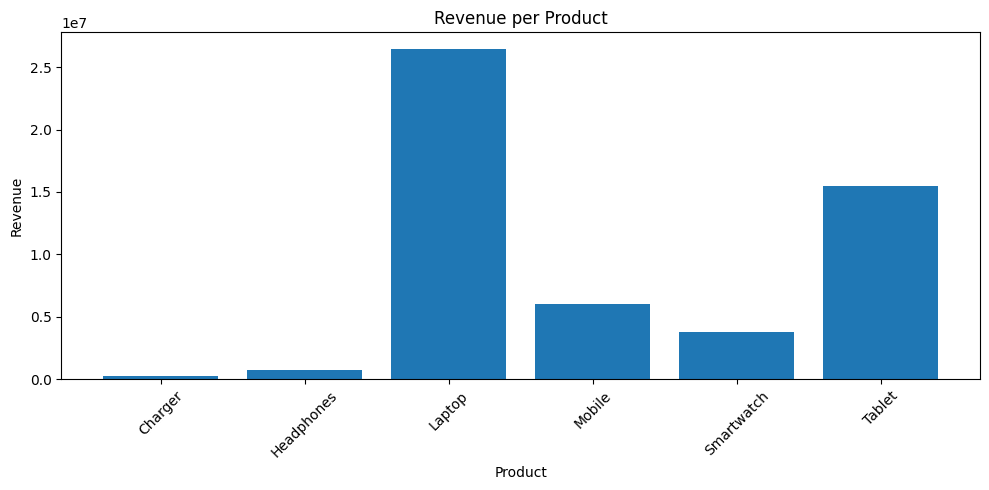

In [154]:


plt.figure(figsize=(10,5))
plt.bar(best_seller_revenue_wise.index, best_seller_revenue_wise.values)

plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue per Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [155]:
Monthly_Revenue['date'] = Monthly_Revenue['date'].astype(str)

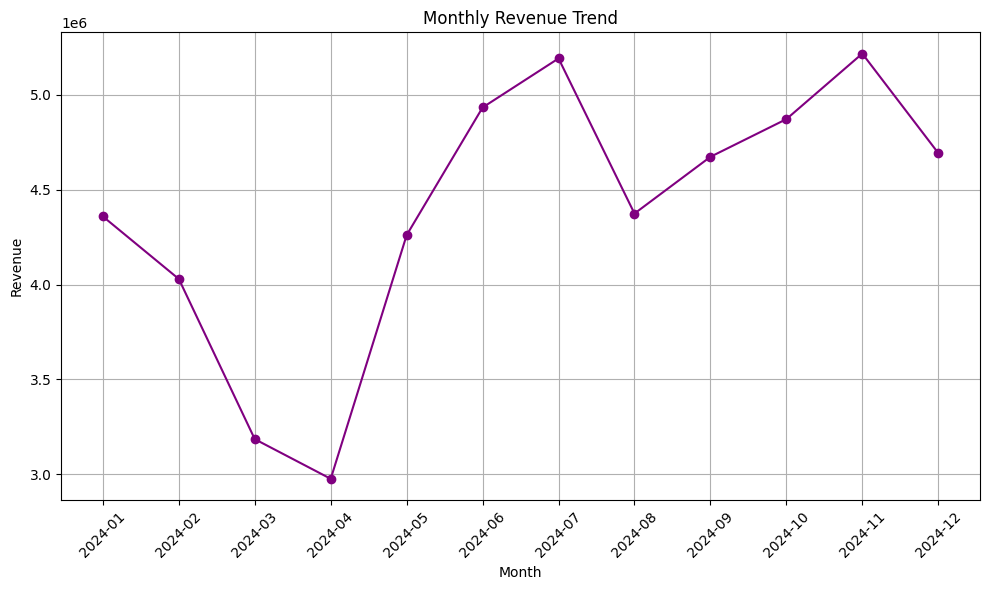

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(Monthly_Revenue['date'],Monthly_Revenue['Revenue'], marker = 'o', linestyle ='-',color='purple')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()